In [1]:
import numpy as np
import healpy as hp
import astropy.units as u
import matplotlib.pyplot as plt
import dropbox
import importlib
import superpixel_rotations as sr
import h5py

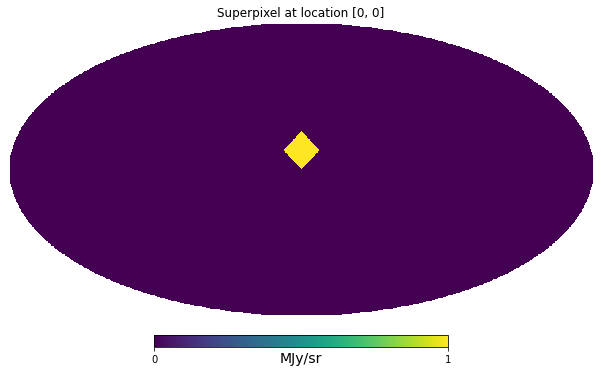

In [11]:
lower_nside = 4
higher_nside = 8
data = sr.test_data(lower_nside,higher_nside,[0,0])
ringed_data = hp.reorder(data, n2r=True)

In [22]:
importlib.reload(sr)

<module 'superpixel_rotations' from '/cita/h/home-2/otijani/Desktop/dustfizz3D/superpixel_rotations.py'>

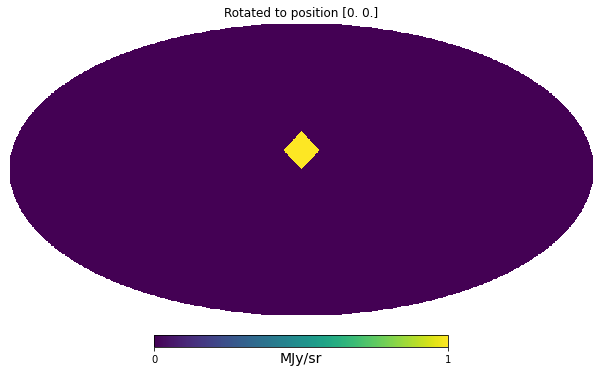

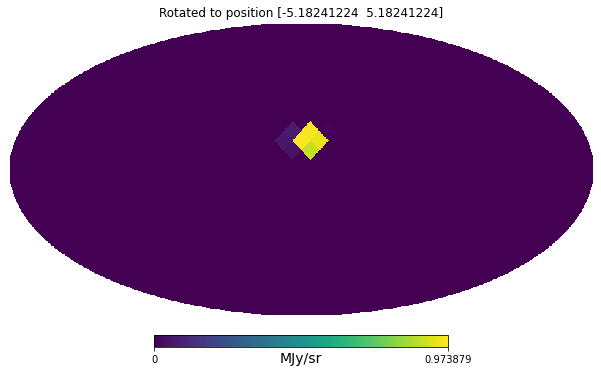

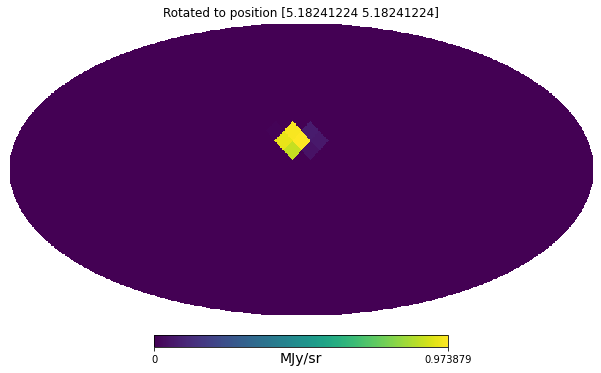

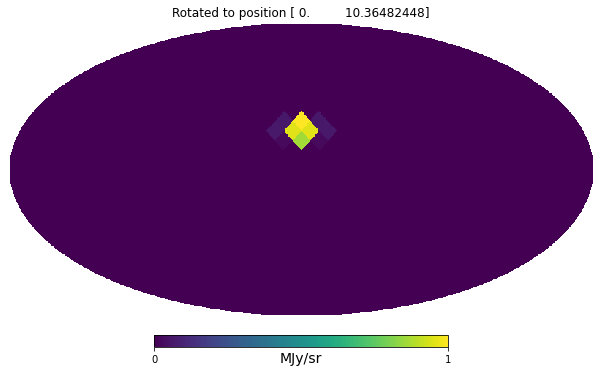

In [23]:
sr.shift_maps(data,lower_nside,higher_nside)

shifted
Position: [-5.18241224  5.18241224]
Ordering: ringed


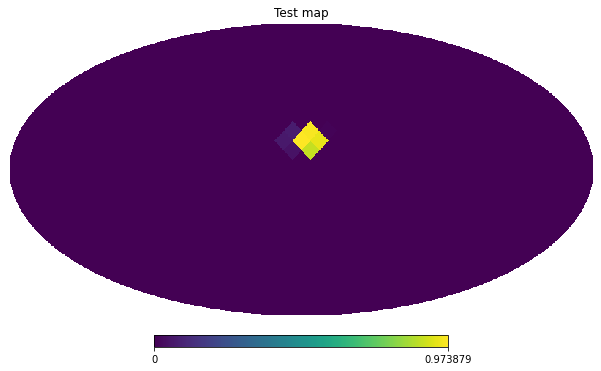

In [74]:
# Read the HDF5 file
with h5py.File('shift_4_8_1.h5', 'r') as hdf:
    # Access the dataset
    for dset in hdf:
        print(dset)
        # Access the data
        data = hdf[dset][:]
        hp.mollview(data, title='Test map')

        # Access metadata
        position = hdf[dset].attrs['position']
        ordering = hdf[dset].attrs['ordering']
        print('Position:', position)
        print('Ordering:', ordering)


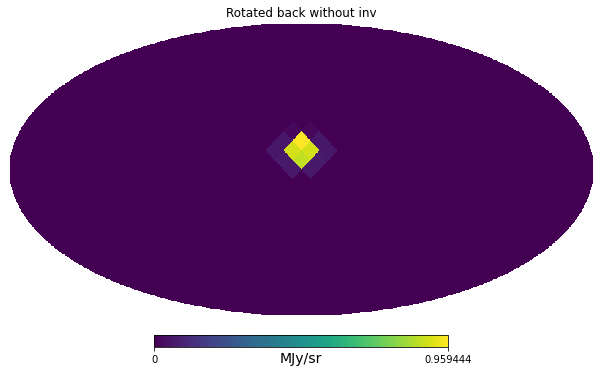

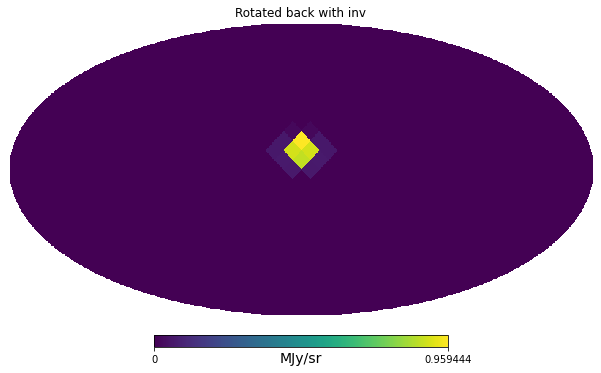

In [10]:
# Shift back to original position to compare residuals
shift_back = sr.shift_back('shift_4_8_3.h5')
shift_back_neg = sr.shift_back_neg('shift_4_8_3.h5')


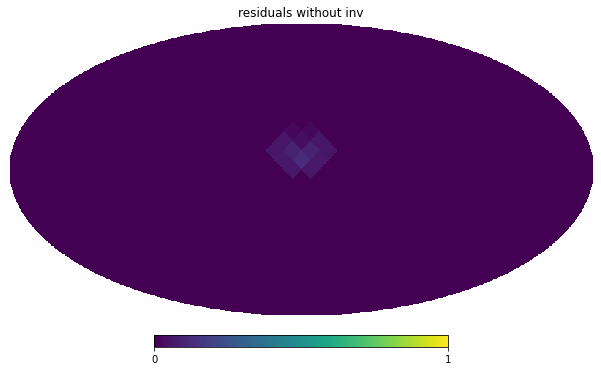

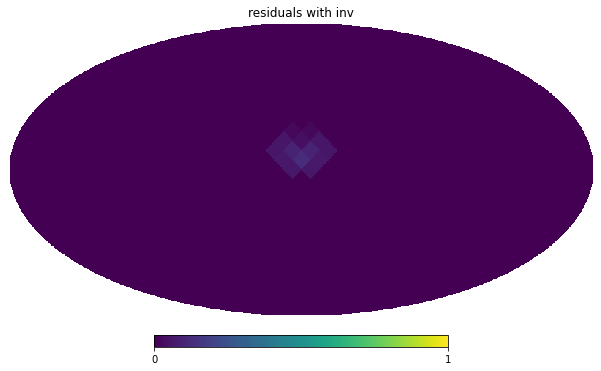

In [13]:
# Residuals
res1 = abs(shift_back-ringed_data)
res2 = abs(shift_back_neg-ringed_data) 
# Plot residuals
hp.mollview(res1, title='residuals without inv',min=np.min(res1),max=1)
hp.mollview(res2, title='residuals with inv',min=np.min(res2),max=1)